In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torch.utils.data import DataLoader
from poc_data import PocDataset, display_sample


NUM_CASES = 2**2

poc_raw_dataset = PocDataset(num_cases=NUM_CASES, test_set=True, repays=False)
data_loader = DataLoader(dataset=poc_raw_dataset,
                        batch_size=NUM_CASES,
                        shuffle=False,
                        pin_memory=True)

all_data, all_data_length, all_event, all_tte, all_meta = next(iter(data_loader))

In [3]:
print(all_data.shape)
print(all_data_length.shape)
print(all_event.shape)

torch.Size([4, 24, 5])
torch.Size([4, 1])
torch.Size([4, 1])


In [4]:
from losses import loss_1_batch, loss_2_batch, loss_3_batch

input_size = 5
output_size = input_size
MAX_LENGTH = 36
NUM_CAUSES = 3
hidden_size_encoder = 512
hidden_size_attention = 512
fc_size_encoder = 512
SIGMA = 1

LOSS_1_AMPLIFIER = 1
LOSS_2_AMPLIFIER = 1
LOSS_3_AMPLIFIER = 0.1

DEVICE = 'cpu'

In [5]:
## Sanity check on only events for loss 1 --> This should give a loss of zero
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 1
first_hitting_time_batch[0,13] = 0
first_hitting_time_batch[0,12] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 0

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 15

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor([0.])


In [6]:
## Sanity check on only events for loss 1 --> This should give a high loss
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0
first_hitting_time_batch[0,13] = 0
first_hitting_time_batch[0,12] = 1

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 0

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 15

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor([20.7233])


In [7]:
## Sanity check on only events for loss 1 --> This should give a high loss
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 1
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0
first_hitting_time_batch[0,13] = 0
first_hitting_time_batch[0,12] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 0

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 15

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor([20.7233])


In [8]:
## Sanity check on only events for loss 1 --> This should give a high loss
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0.75
first_hitting_time_batch[0,13] = 0
first_hitting_time_batch[0,12] = 0
first_hitting_time_batch[0,11] = 0
first_hitting_time_batch[0,5] = 0.25

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 0

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 15

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 12

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)
#But it doesn't, it does what I thought would be the problem :/

loss1= tensor([0.])


In [9]:
## Check including censoring events, this should be a high loss
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,18] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0
first_hitting_time_batch[0,13] = 0.02
first_hitting_time_batch[0,12] = 0.23
first_hitting_time_batch[0,9] = 0.25
first_hitting_time_batch[0,5] = 0.25

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 3

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 15

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
data_length= 15
CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
CIF_K= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0

In [10]:
## Check including censoring events, this should be a high loss
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0
first_hitting_time_batch[0,13] = 0.02
first_hitting_time_batch[0,12] = 0.23
first_hitting_time_batch[0,9] = 0.25
first_hitting_time_batch[0,5] = 0.25

first_hitting_time_batch = torch.softmax(first_hitting_time_batch, dim=1)

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 3

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 90909

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

CIF_K= tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0152, 0.0303, 0.0455, 0.0606,
        0.0758, 0.0909, 0.1061, 0.1212, 0.1364, 0.1515, 0.1667, 0.1818, 0.1970,
        0.2121, 0.2273, 0.2424, 0.2576, 0.2727, 0.2879, 0.3030, 0.3182, 0.3333])
CIF_K= tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0152, 0.0303, 0.0455, 0.0606,
        0.0758, 0.0909, 0.1061, 0.1212, 0.1364, 0.1515, 0.1667, 0.1818, 0.1970,
        0.2121, 0.2273, 0.2424, 0.2576, 0.2727, 0.2879, 0.3030, 0.3182, 0.3333])
CIF_K= tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0152, 0.0303, 0.0455, 0.0606,
        0.0758, 0.0909, 0.1061, 0.1212, 0.1364, 0.1515, 0.1667, 0.1818, 0.1970,
        0.2121, 0.2273, 0.2424, 0.2576, 0.2727, 0.2879, 0.3030, 0.3182, 0.3333])
data_length= 15


In [11]:
## Checking full repays
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,35 + 2*MAX_LENGTH] = 1
first_hitting_time_batch[0,34 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,15 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,14 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,13 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,12 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,9 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,5 + 2*MAX_LENGTH] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 2

batch_tte = torch.zeros(BATCH_LENGTH, 1)
batch_tte[0] = 36

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 36

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor([0.])


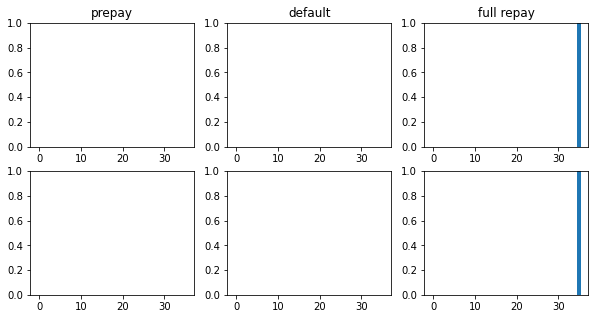

In [12]:
from utils import plot_fht, plot_cif, plot_fht_and_cif

first_hitting_time = first_hitting_time_batch[0]
plot_fht_and_cif(first_hitting_time, MAX_LENGTH)

#We bedoelen dat als bij event 0, de index 14 op 1 staat, dan is het na de 15de observation dat het gaat falen, dus na het data-inputje dat op index 14 staat, maar dus de 15de input is

In [13]:
loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_tte, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor([0.])


In [14]:
loss2 = LOSS_2_AMPLIFIER*loss_2_batch(first_hitting_time_batch, batch_event, batch_tte, NUM_CAUSES, MAX_LENGTH, SIGMA, DEVICE)
print("loss2=", loss2)

loss2= tensor([0.])


In [15]:
#loss3 = LOSS_3_AMPLIFIER*loss_3_batch(output_batch, batch_data.detach())
#print("loss3=", loss3)

In [16]:
from losses import CIF_K_tau as cif
from losses import CIF_K as cif_k
from baseline_losses import CIF_K as cif_k_baseline

import matplotlib.pyplot as plt
#def CIF_K(first_hitting_time, event_k, data_length, MAX_LENGTH):

a = torch.randn(24) + 2
a[:10] = torch.zeros(10)
print(a)
a = torch.softmax(a, dim=0)
print(a)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.2665, 3.3914, 1.2001, 1.3777, 1.5898, 3.5938, 2.1734, 1.1287,
        3.4193, 1.0938, 1.2417, 3.4083, 1.5473, 1.3925])
tensor([0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
        0.0056, 0.0198, 0.1654, 0.0185, 0.0221, 0.0273, 0.2025, 0.0489, 0.0172,
        0.1701, 0.0166, 0.0193, 0.1682, 0.0262, 0.0224])


event 0= tensor(0.0056)
tensor([0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
        0.0056, 0.0198, 0.1654, 0.0185, 0.0221, 0.0273, 0.2025, 0.0489, 0.0172,
        0.1701, 0.0166, 0.0193, 0.1682, 0.0262, 0.0224])


<BarContainer object of 24 artists>

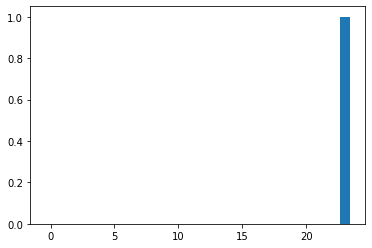

In [17]:
#def CIF_K_tau(first_hitting_time, event_k, tte, data_length, MAX_LENGTH):
p_ev0 = cif(a, 0, 1, 1, 24)
print("event 0=", p_ev0)

print(a)

plt.bar([i for i in range(24)], cif_k(a, 0, 24, 24).numpy())
#TODO dezelfde CIF eens plotten voor DEEPHIT! Volgens mij zit daar ook een fout, dezelfde indexering denk ik!


event 0= tensor(0.0056)
tensor([0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
        0.0056, 0.0198, 0.1654, 0.0185, 0.0221, 0.0273, 0.2025, 0.0489, 0.0172,
        0.1701, 0.0166, 0.0193, 0.1682, 0.0262, 0.0224])
tensor([0.0056, 0.0111, 0.0167, 0.0223, 0.0278, 0.0334, 0.0390, 0.0445, 0.0501,
        0.0557, 0.0754, 0.2408, 0.2593, 0.2814, 0.3087, 0.5111, 0.5601, 0.5773,
        0.7473, 0.7640, 0.7832, 0.9514, 0.9776, 1.0000])


<BarContainer object of 24 artists>

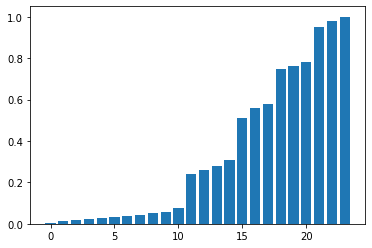

In [23]:
#def CIF_K_tau(first_hitting_time, event_k, tte, data_length, MAX_LENGTH):
p_ev0 = cif(a, 0, 1, 1, 24)
print("event 0=", p_ev0)

print(a)
print(cif_k_baseline(a, 0, 24))

plt.bar([i for i in range(24)], cif_k_baseline(a, 0, 24).numpy())
#TODO dezelfde CIF eens plotten voor DEEPHIT! Volgens mij zit daar ook een fout, dezelfde indexering denk ik!


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000,
        0.2500, 0.0000, 0.0000, 0.2300, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000])


<BarContainer object of 24 artists>

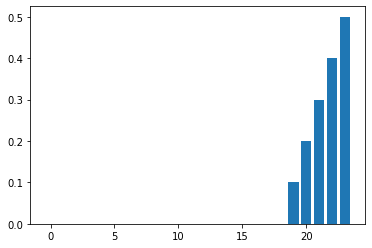

In [30]:
b = torch.zeros(24*2)

b[18] = 0
b[15] = 0
b[14] = 0
b[13] = 0.02
b[12] = 0.23
b[9] = 0.25
b[5] = 0.5


print(b)
b = torch.softmax(b, dim=0)
print(cif_k(b, 1, 20, 24))

plt.bar([i for i in range(24)], cif_k(b, 0, 20, 24).numpy())